## Danielle Adler's Homework Assignment 4

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Datasource: https://cloud.google.com/bigquery/public-data/bay-bike-share

Ford GoBike Company Website: https://www.fordgobike.com/

## Commuting Information
#### What are the 5 most popular trips that you would call "commuter trips"?

### Investigating Commuting Times

The first question I chose to tackle around commuting vs. subscriber information was commuting. In order to understand commuting information, I had to first parse out the specific weekday commuting times. I defined a commute as starting at one station and ending at another. For the morning, I looked at each fifteen minute time slot between 7:00am and 10:30am, figuring that the top commuting times for San Francisco's bikeshare would fall within that time range. Note that while the columns say the timing is in UTC, it happens to actually be in PST (the timezone of San Francisco).

In [2]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT CASE WHEN (TIME(start_date)) >= "7:00:00" and (TIME(start_date)) < "7:15:00" THEN "7-7:15" WHEN (TIME(start_date)) >= "7:15:00" and (TIME(start_date)) < "7:30:00" THEN "7:15-7:30" WHEN (TIME(start_date)) >= "7:30:00" and (TIME(start_date)) < "7:45:00" THEN "7:30-7:45" WHEN (TIME(start_date)) >= "7:45:00" and (TIME(start_date)) < "8:00:00" THEN "7:45-8" WHEN (TIME(start_date)) >= "8:00:00" and (TIME(start_date)) < "8:15:00" THEN "8-8:15" WHEN (TIME(start_date)) >= "8:15:00" and (TIME(start_date)) < "8:30:00" THEN "8:15-8:30" WHEN (TIME(start_date)) >= "8:30:00" and (TIME(start_date)) < "8:45:00" THEN "8:30-8:45" WHEN (TIME(start_date)) >= "8:45:00" and (TIME(start_date)) < "9:00:00" THEN "8:45-9" WHEN (TIME(start_date)) >= "9:00:00" and (TIME(start_date)) < "9:15:00" THEN "9-9:15" WHEN (TIME(start_date)) >= "9:15:00" and (TIME(start_date)) < "9:30:00" THEN "9:15-9:30" WHEN (TIME(start_date)) >= "9:30:00" and (TIME(start_date)) < "9:45:00" THEN "9:30-9:45" WHEN (TIME(start_date)) >= "9:45:00" and (TIME(start_date)) < "10:00:00" THEN "9:45 - 10" WHEN (TIME(start_date)) >= "10:00:00" and (TIME(start_date)) < "10:15:00" THEN "10-10:15" WHEN (TIME(start_date)) >= "10:15:00" and (TIME(start_date)) < "10:30:00" THEN "10:15-10:30" ELSE NULL END as start_times, count(distinct trip_id) as num_of_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` where start_station_id != end_station_id and TIME(start_date) >= "7:00:00" and (TIME(start_date)) < "10:30:00" and extract(dayofweek from start_date) in (2,3,4,5,6) group by 1 order by 2 desc' > morning_commute.csv


Waiting on bqjob_r36c63c38afe38eb8_00000163ce3faeda_1 ... (4s) Current status: DONE   

In [3]:
morning_commute=pd.read_csv('morning_commute.csv')

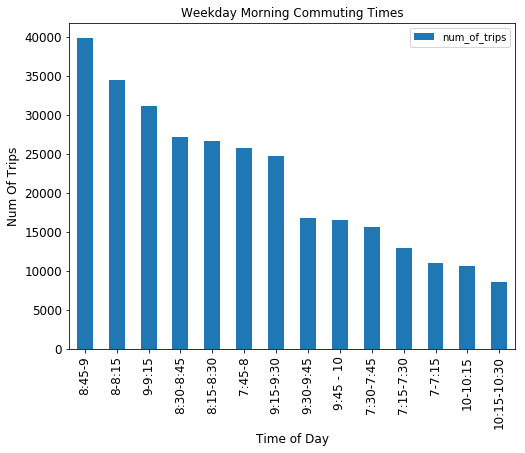

In [4]:
mc_bar = morning_commute.plot(x='start_times', y='num_of_trips', kind='bar', title ="Weekday Morning Commuting Times", figsize=(8, 6), legend=True, fontsize=12)

mc_bar.set_xlabel("Time of Day", fontsize=12)
mc_bar.set_ylabel("Num Of Trips", fontsize=12)

mc_bar

From the bar graph above that shows the number of trips within each fifteen minute interval, the top 5 fifteen minutes blocks of bike trips beginning fell between 8:00am - 9:15am. Therefore, I am making an assumption based on this data for the analysis below that the top commuting trips fall between 8:00am - 9:15am. Before and after these times, ridership still remains strong, but is not quite as high.

Next, I will compute the same type of analysis to identify the top commuting times for the evening bike trips. Here, I am looking at each fiften minute interval from 3:45pm through 7:15, assuming that the top evening commuting times were likely to fall within that range.

In [5]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT CASE WHEN (TIME(start_date)) >= "15:45:00" and (TIME(start_date)) < "16:00:00" THEN "3:45-4" WHEN (TIME(start_date)) >= "16:00:00" and (TIME(start_date)) < "16:15:00" THEN "4-4:15" WHEN (TIME(start_date)) >= "16:15:00" and (TIME(start_date)) < "16:30:00" THEN "4:15-4:30" WHEN (TIME(start_date)) >= "16:30:00" and (TIME(start_date)) < "16:45:00" THEN "4:30-4:45" WHEN (TIME(start_date)) >= "16:45:00" and (TIME(start_date)) < "17:00:00" THEN "4:45-5" WHEN (TIME(start_date)) >= "17:00:00" and (TIME(start_date)) < "17:15:00" THEN "5-5:15" WHEN (TIME(start_date)) >= "17:15:00" and (TIME(start_date)) < "17:30:00" THEN "5:15-5:30" WHEN (TIME(start_date)) >= "17:30:00" and (TIME(start_date)) < "17:45:00" THEN "5:30-5:45" WHEN (TIME(start_date)) >= "17:45:00" and (TIME(start_date)) < "18:00:00" THEN "5:45-6" WHEN (TIME(start_date)) >= "18:00:00" and (TIME(start_date)) < "18:15:00" THEN "6-6:15" WHEN (TIME(start_date)) >= "18:15:00" and (TIME(start_date)) < "18:30:00" THEN "6:15-6:30" WHEN (TIME(start_date)) >= "18:30:00" and (TIME(start_date)) < "18:45:00" THEN "6:30-6:45" WHEN (TIME(start_date)) >= "18:45:00" and (TIME(start_date)) < "19:00:00" THEN "6:45-7" WHEN (TIME(start_date)) >= "19:00:00" and (TIME(start_date)) < "19:15:00" THEN "7-7:15" ELSE NULL END as start_times, count(distinct trip_id) as num_of_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` where start_station_id != end_station_id and TIME(start_date) >= "15:45:00" and (TIME(start_date)) < "19:15:00" and extract(dayofweek from start_date) in (2,3,4,5,6) group by 1 order by 2 desc' > evening_commute.csv


Waiting on bqjob_r228de3798aef9dc7_00000163ce3fd124_1 ... (3s) Current status: DONE   

In [6]:
evening_commute=pd.read_csv('evening_commute.csv')

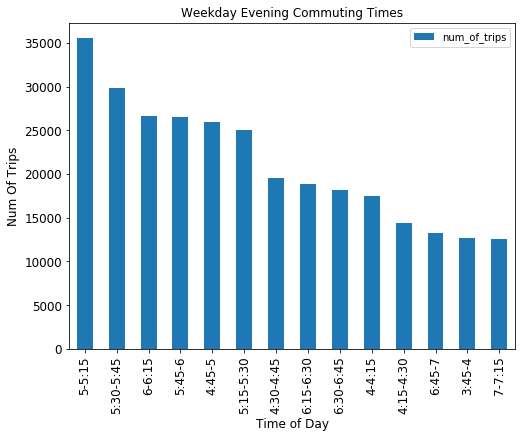

In [7]:
ec_bar = evening_commute.plot(x='start_times', y='num_of_trips', kind='bar', title ="Weekday Evening Commuting Times", figsize=(8, 6), legend=True, fontsize=12)

ec_bar.set_xlabel("Time of Day", fontsize=12)
ec_bar.set_ylabel("Num Of Trips", fontsize=12)

ec_bar

From the bar graph above, we can see that the most common evening commuting starting times for bikeshare is between 5:00pm - 5:15pm, with many others falling between 4:45pm - 6:15pm. However, if I used an hour and a half here as opposed to an hour and fifteen minutes, I would not be congruent with the morning commuting times. If I were not consistent, I would not be able to accurately evaluate the top 5 commuting trips. As 4:45pm - 5:00pm, and 5:15pm - 5:30pm are so close together, I decided to just make the range 5:00pm - 6:15pm.

### Investigating Commuting Stations

Next, I wanted to look at the top starting and ending stations for the morning commute. I chose to evaluate all stations by their station id as the names for each station were often spelled differently in different instances.

In [8]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT start_station_id, end_station_id, bs.landmark as starting_city, bst.landmark as ending_city, count(distinct trip_id) as morning_commute_num_of_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` bt left join `bigquery-public-data.san_francisco.bikeshare_stations` bs on bs.station_id = bt.start_station_id left join `bigquery-public-data.san_francisco.bikeshare_stations` bst on bst.station_id = bt.end_station_id where start_station_id != end_station_id and TIME(start_date) >= "08:00:00" and (TIME(start_date)) < "9:15:00" and extract(dayofweek from start_date) in (2,3,4,5,6) group by 1,2,3,4 order by 5 desc' > morning_stations.csv

Waiting on bqjob_r4df6e0bf7e28d52d_00000163ce3fef22_1 ... (2s) Current status: DONE   

In [10]:
morning_stations=pd.read_csv('morning_stations.csv')

print("Morning Commute Trips")
morning_stations.head(10)

Morning Commute Trips


,start_station_id,end_station_id,starting_city,ending_city,morning_commute_num_of_trips
0,50,61,San Francisco,San Francisco,3245
1,69,65,San Francisco,San Francisco,2203
2,74,61,San Francisco,San Francisco,2137
3,74,60,San Francisco,San Francisco,1847
4,70,51,San Francisco,San Francisco,1833
5,50,60,San Francisco,San Francisco,1823
6,77,64,San Francisco,San Francisco,1801
7,70,63,San Francisco,San Francisco,1747
8,70,50,San Francisco,San Francisco,1663
9,70,74,San Francisco,San Francisco,1621


In [ ]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT start_station_id, end_station_id, bs.landmark as starting_city, bst.landmark as ending_city, count(distinct trip_id) as evening_commute_num_of_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` bt left join `bigquery-public-data.san_francisco.bikeshare_stations` bs on bs.station_id = bt.start_station_id left join `bigquery-public-data.san_francisco.bikeshare_stations` bst on bst.station_id = bt.end_station_id where start_station_id != end_station_id and TIME(start_date) >= "17:00:00" and (TIME(start_date)) < "18:15:00" and extract(dayofweek from start_date) in (2,3,4,5,6) group by 1,2,3,4 order by 5 desc' > evening_stations.csv

In [11]:
evening_stations=pd.read_csv('evening_stations.csv')

print("Evening Commute Trips")
evening_stations.head(10)

Evening Commute Trips


,start_station_id,end_station_id,starting_city,ending_city,evening_commute_num_of_trips
0,61,50,San Francisco,San Francisco,2221
1,60,74,San Francisco,San Francisco,2181
2,64,77,San Francisco,San Francisco,1964
3,67,69,San Francisco,San Francisco,1832
4,51,70,San Francisco,San Francisco,1724
5,65,69,San Francisco,San Francisco,1709
6,74,70,San Francisco,San Francisco,1689
7,55,70,San Francisco,San Francisco,1609
8,61,74,San Francisco,San Francisco,1437
9,63,70,San Francisco,San Francisco,1359


The top 5 commuting trips could be in the morning or the evening. Therefore, I have to look at the top number of trips within both datasets together. However, if a trip happens in the morning and the evening, the trips are not added as these would still be separate commutes (i.e. from home to work or back home after work). The top 5 commuting trips are:
- Station 50 to 61 with 3,245 trips in the morning
- Station 61 to 50 with 2,221 trips in the evening
- Station 69 to 65 with 2,203 trips in the morning
- Station 60 to 74 with 2,181 trips in the evening
- Station 74 to 61 with 2,137 trips in the evening

## Subscriber Information
#### What are your recommendations for offers (justify based on your findings)?

### Reviewing Commuting Behavior

As we see within the top commuting trips, we do have some similarities between the most common starting stations during the morning commute, and the most common ending stations in the evening commute. To understand full ridership behavior, and to begin to make our subscriber recommendations. I decided to evaluate the top morning starting stations and the top evening ending stations to see the percent of all commuting rides that fell within these stations.

In [12]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT start_station_id, count(distinct trip_id) as morning_commute_num_of_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` where start_station_id != end_station_id and TIME(start_date) >= "08:00:00" and (TIME(start_date)) < "9:15:00" and extract(dayofweek from start_date) in (2,3,4,5,6) group by 1 order by 2 desc' > top_morning_stations.csv



Waiting on bqjob_r2d9258c23ad276de_00000163ce4058fc_1 ... (2s) Current status: DONE   

In [13]:
top_morning_stations=pd.read_csv('top_morning_stations.csv')

print("Top Morning Starting Stations")
top_morning_stations.head()

Top Morning Starting Stations


,start_station_id,morning_commute_num_of_trips
0,70,21356
1,69,19592
2,50,13137
3,55,10808
4,74,9048


In [19]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT end_station_id, count(distinct trip_id) as evening_commute_num_of_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` where start_station_id != end_station_id and TIME(start_date) >= "17:00:00" and (TIME(start_date)) < "18:15:00" and extract(dayofweek from start_date) in (2,3,4,5,6) group by 1 order by 2 desc' > top_evening_stations.csv


Waiting on bqjob_r5a213213fbcece13_00000163c8c36f77_1 ... (0s) Current status: DONE   

In [14]:
top_evening_stations=pd.read_csv('top_evening_stations.csv')

print("Top Evening Ending Stations")
top_evening_stations.head()

Top Evening Ending Stations


,end_station_id,evening_commute_num_of_trips
0,70,21548
1,69,18912
2,74,9100
3,50,8983
4,55,8276


In [40]:
top_morning = top_morning_stations.morning_commute_num_of_trips[(top_morning_stations.start_station_id == 70)
                                                | (top_morning_stations.start_station_id == 69)
                                                 | (top_morning_stations.start_station_id == 50)
                                                 | (top_morning_stations.start_station_id == 55)
                                                 | (top_morning_stations.start_station_id == 74)].sum() 

all_morning = top_morning_stations.morning_commute_num_of_trips.sum()


top_evening = top_evening_stations.evening_commute_num_of_trips[(top_evening_stations.end_station_id == 70)
                                                | (top_evening_stations.end_station_id == 69)
                                                 | (top_evening_stations.end_station_id == 50)
                                                 | (top_evening_stations.end_station_id == 55)
                                                 | (top_evening_stations.end_station_id == 74)].sum() 

all_evening = top_evening_stations.evening_commute_num_of_trips.sum()

print("The top 5 morning commute starting stations are the same as the top 5 evening commute ending stations. These stations make up "
      , round(top_morning / all_morning * 100,1),"% of the starting station rides during the morning commute and "
      , round(top_evening / all_evening * 100,1), "% of the ending station rides during the evening commute. This shows that almost half of riders",
      " are beginning their trips in the morning and ending in the evening at the same place. Therefore, I am going to make the assumption that somewhere between 40% and 50% of bikeshare users ride almost daily to and from work. In order to increase subscribership, I would also encourage Ford GoBike to market towards prospects near these top stations." ,sep="")

The top 5 morning commute starting stations are the same as the top 5 evening commute ending stations. These stations make up 46.4% of the starting station rides during the morning commute and 46.5% of the ending station rides during the evening commute. This shows that almost half of riders are beginning their trips in the morning and ending in the evening at the same place. Therefore, I am going to make the assumption that somewhere between 40% and 50% of bikeshare users ride almost daily to and from work. In order to increase subscribership, I would also encourage Ford GoBike to market towards prospects near these top stations.


### Subscriber vs. Customer Trips Overtime

After understanding the initials of subscriber behavior, I decided we had to evaluate changes overtime, and make some sanity checks on the data. I wanted to review subscriber type data for each weekday for all weeks of data within our dataset. The query and initial chart are below.

In [16]:
! bq query --use_legacy_sql=FALSE --max_rows=1000 --format=csv 'with subscriber_table as (SELECT EXTRACT(week from start_date) as week_num, EXTRACT(year from start_date) as year_num, COUNT(DISTINCT trip_id) as subscriber_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Subscriber" and extract(dayofweek from start_date) in (2,3,4,5,6) GROUP BY 1,2 ORDER BY 1), customer_table as (SELECT EXTRACT(week from start_date) as week_num, EXTRACT(year from start_date) as year_num, COUNT(DISTINCT trip_id) as customer_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Customer" and extract(dayofweek from start_date) in (2,3,4,5,6) GROUP BY 1,2 ORDER BY 1) SELECT EXTRACT(year from start_date) as year_num, EXTRACT(week from start_date) as week_num, st.subscriber_trips, ct.customer_trips, COUNT(DISTINCT trip_id) as total_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` bt LEFT JOIN subscriber_table st on st.week_num = EXTRACT(week from bt.start_date) and st.year_num = EXTRACT(year from bt.start_date) LEFT JOIN customer_table ct on ct.week_num = EXTRACT(week from bt.start_date) and ct.year_num = EXTRACT(year from bt.start_date) where extract(dayofweek from start_date) in (2,3,4,5,6) GROUP BY 1,2,3,4 ORDER BY 1,2' > behavior_overtime.csv


Waiting on bqjob_r24c68611373363d3_00000163ce40f09d_1 ... (15s) Current status: DONE   

In [17]:
behavior_overtime=pd.read_csv('behavior_overtime.csv')

behavior_overtime["year_week"] = behavior_overtime["year_num"].apply(str) + '_' + behavior_overtime["week_num"].apply(str)

print("Behavior Overtime")
behavior_overtime.head()

Behavior Overtime


,year_num,week_num,subscriber_trips,customer_trips,total_trips,year_week
0,2013,34,769,693,1462,2013_34
1,2013,35,1704,1651,3355,2013_35
2,2013,36,3106,1358,4464,2013_36
3,2013,37,3880,1363,5243,2013_37
4,2013,38,4228,1344,5572,2013_38


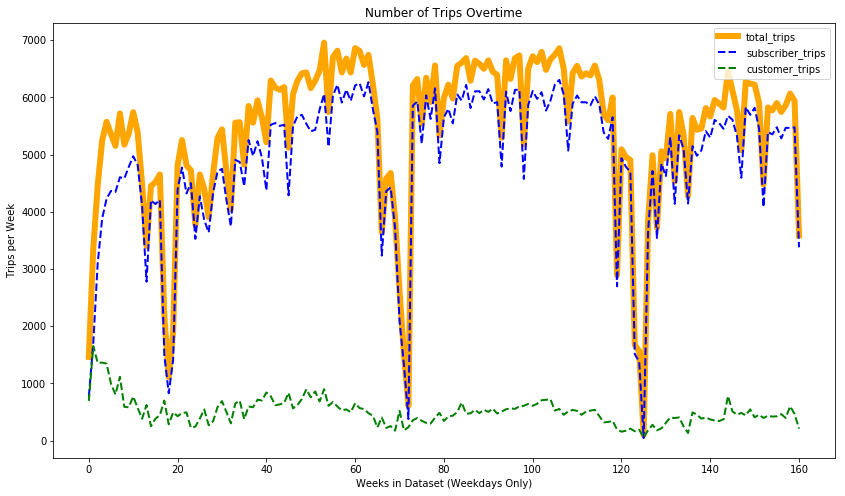

In [39]:
plt.plot('total_trips', data=behavior_overtime, marker='', color='orange', linewidth=6)
plt.plot('subscriber_trips', data=behavior_overtime, marker='', color='blue', linewidth=2, linestyle = 'dashed')
plt.plot('customer_trips', data=behavior_overtime, marker='', color='green', linewidth=2, linestyle='dashed')

fig = plt.gcf()
fig.set_size_inches(14, 8)

plt.title('Number of Trips Overtime')
plt.xlabel('Weeks in Dataset (Weekdays Only)')
plt.ylabel('Trips per Week')
plt.legend(loc='upper right')
plt.show()

The data looks fairly consistent to what I would expect from a gut check perspective. The periods of extreme decline in total ridership are the holiday time periods of each year. This holiday time period dropoff speaks to the fact again that subscribers are likely using the service for commuting. During the holiday time period, many folks are off of work and would therefore have no reason to commute. Total rides follows the trend of subscriber behavior very closely. Customer behavior is on a bit of a decline, so it makes sense that one of our initiatives is to drive up this ridership.

### Subscriber vs. Customer by Several Data Cuts

Next, I am going to create a dataset that shows the number of trips by weekday vs. weekend, station route (round trip or riding from one station to another), and trip duration of greater than 30 minutes or less than 30 minutes. I chose 30 minutes as this amount was specifically related to one of the offers that we are investigating.

In [19]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT subscriber_type, CASE WHEN extract(dayofweek from start_date) in (2,3,4,5,6) THEN "weekday" ELSE "weekend" END as Type_of_Day, CASE WHEN start_station_id = end_station_id THEN "same station" ELSE "different station" END as Station_Route, CASE WHEN duration_sec <= 1800 THEN "less than or equal to 30 min" ELSE "greater than 30 min" END as Trip_Duration, count(distinct trip_id) as num_of_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` group by 1,2,3,4 order by 1,2,3,4' > subscriber_data.csv 

Waiting on bqjob_r42e7d34306df1927_00000163ce42659a_1 ... (4s) Current status: DONE   

In [20]:
subscriber_data=pd.read_csv('subscriber_data.csv')

print("Subscriber Data")
subscriber_data

Subscriber Data


,subscriber_type,Type_of_Day,Station_Route,Trip_Duration,num_of_trips
0,Customer,weekday,different station,greater than 30 min,13998
1,Customer,weekday,different station,less than or equal to 30 min,55890
2,Customer,weekday,same station,greater than 30 min,8148
3,Customer,weekday,same station,less than or equal to 30 min,3621
4,Customer,weekend,different station,greater than 30 min,12472
5,Customer,weekend,different station,less than or equal to 30 min,32296
6,Customer,weekend,same station,greater than 30 min,7395
7,Customer,weekend,same station,less than or equal to 30 min,2989
8,Subscriber,weekday,different station,greater than 30 min,3684
9,Subscriber,weekday,different station,less than or equal to 30 min,778649


In [21]:
print(round(subscriber_data.num_of_trips[subscriber_data.subscriber_type == 'Subscriber'].sum() / subscriber_data.num_of_trips.sum() * 100,1)
      , "% subscribers use the bikeshare program, while ", round(subscriber_data.num_of_trips[subscriber_data.subscriber_type == 'Customer'].sum() / subscriber_data.num_of_trips.sum() * 100,1)
      ,"% of customers use the bikeshare program. Subscribers are the riders that are annual or 30-day members, so it makes sense to continue to cater to these customers with an annual membership as they are the bulk of the riders. ", sep="")

86.1% subscribers use the bikeshare program, while 13.9% of customers use the bikeshare program. Subscribers are the riders that are annual or 30-day members, so it makes sense to continue to cater to these customers with an annual membership as they are the bulk of the riders. 


#### Weekend vs. Weekday

In [22]:
print(round(subscriber_data.num_of_trips[subscriber_data.Type_of_Day == 'weekday'].sum() / subscriber_data.num_of_trips.sum() * 100,1)
      , "% of riders take trips during the week, while ", round(subscriber_data.num_of_trips[subscriber_data.Type_of_Day == 'weekend'].sum() / subscriber_data.num_of_trips.sum() * 100,1)
      , "% of riders take trips during the weekend.", sep="")

88.6% of riders take trips during the week, while 11.4% of riders take trips during the weekend.


In [23]:
print(round(subscriber_data.num_of_trips[(subscriber_data.Type_of_Day == 'weekday') & (subscriber_data.subscriber_type == 'Subscriber')] .sum() / subscriber_data.num_of_trips[subscriber_data.subscriber_type == 'Subscriber'].sum() * 100,1)
      , "% of subscribers take bike trips during the weekdays, while ", round(subscriber_data.num_of_trips[(subscriber_data.Type_of_Day == 'weekday') & (subscriber_data.subscriber_type == 'Customer')].sum() / subscriber_data.num_of_trips[subscriber_data.subscriber_type == 'Customer'].sum() * 100,1)
      , "% of customers take bike trips during the weekdays. All of our data so far, especially this point, does show that subscribers are using the bikeshare service for commuting.", sep="")

93.3% of subscribers take bike trips during the weekdays, while 59.7% of customers take bike trips during the weekdays. All of our data so far, especially this point, does show that subscribers are using the bikeshare service for commuting.


In [24]:
print(round(subscriber_data.num_of_trips[(subscriber_data.Type_of_Day == 'weekend') & (subscriber_data.subscriber_type == 'Subscriber')] .sum() / subscriber_data.num_of_trips[subscriber_data.subscriber_type == 'Subscriber'].sum() * 100,2)
      , "% of subscribers take bike trips during the weekends, while ", round(subscriber_data.num_of_trips[(subscriber_data.Type_of_Day == 'weekend') & (subscriber_data.subscriber_type == 'Customer')].sum() / subscriber_data.num_of_trips[subscriber_data.subscriber_type == 'Customer'].sum() * 100,1)
      , "% of customers take bike trips during the weekends. The fact that just under half of customers take trips during the weekends speaks to these riders being more interested in leisure outtings.", sep="")

6.67% of subscribers take bike trips during the weekends, while 40.3% of customers take bike trips during the weekends. The fact that just under half of customers take trips during the weekends speaks to these riders being more interested in leisure outtings.


#### Different Station vs. Same Station

In [25]:
print(round(subscriber_data.num_of_trips[subscriber_data.Station_Route == 'different station'].sum() / subscriber_data.num_of_trips.sum() * 100,1)
      , "% of riders begin and end at different stations, while ", round(subscriber_data.num_of_trips[subscriber_data.Station_Route == 'same station'].sum() / subscriber_data.num_of_trips.sum() * 100,2)
      , "% of riders complete round trip rides.", sep="")

96.7% of riders begin and end at different stations, while 3.26% of riders complete round trip rides.


In [26]:
print(round(subscriber_data.num_of_trips[(subscriber_data.Station_Route == 'different station') & (subscriber_data.subscriber_type == 'Subscriber')] .sum() / subscriber_data.num_of_trips[subscriber_data.subscriber_type == 'Subscriber'].sum() * 100,1)
      , "% of subscribers begin and end at different stations, while ", round(subscriber_data.num_of_trips[(subscriber_data.Station_Route == 'different station') & (subscriber_data.subscriber_type == 'Customer')].sum() / subscriber_data.num_of_trips[subscriber_data.subscriber_type == 'Customer'].sum() * 100,1)
      , "% of customers begin and end at different stations. This shows that subscribers are mostly using the bikeshare service to go from point A to point B, which once again speask to commuting.", sep="")

98.8% of subscribers begin and end at different stations, while 83.8% of customers begin and end at different stations. This shows that subscribers are mostly using the bikeshare service to go from point A to point B, which once again speask to commuting.


In [27]:
print(round(subscriber_data.num_of_trips[(subscriber_data.Station_Route == 'same station') & (subscriber_data.subscriber_type == 'Subscriber')].sum() / subscriber_data.num_of_trips[subscriber_data.subscriber_type == 'Subscriber'].sum() * 100,2)
      , "% of subscribers complete round trip rides, while ", round(subscriber_data.num_of_trips[(subscriber_data.Station_Route == 'same station') & (subscriber_data.subscriber_type == 'Customer')] .sum() / subscriber_data.num_of_trips[subscriber_data.subscriber_type == 'Customer'].sum() * 100,1)
      , "% of customers complete round trip rides. This shows again that more customers are using the service for leisure rides where they will start and end at the same station.", sep="")

1.17% of subscribers complete round trip rides, while 16.2% of customers complete round trip rides. This shows again that more customers are using the service for leisure rides where they will start and end at the same station.


#### Trip Duration

As one of the offer types was "a day pass that allows unlimited 30-minute rides for 24 hours," I wanted to look at the timing of subscribers and customers in as many ways as I could. In addition to the analysis that was done above where I cut the data into number of trips greater than, or less than or equal to 30 minutes, I wanted to look at the overall duration. Therefore, in the histograms below, I have evaluted duration from the subscriber and customer points of view. This level of analysis would help me understand more about ridership behavior.

In [28]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT EXTRACT(date from start_date) as day, trip_id, subscriber_type, avg(duration_sec) as time_in_sec FROM `bigquery-public-data.san_francisco.bikeshare_trips` group by 1,2,3 order by 1 LIMIT 98348' > trip_times.csv


Waiting on bqjob_r41126adeaad8c6d5_00000163ce42ba63_1 ... (4s) Current status: DONE   

In [29]:
trip_times=pd.read_csv('trip_times.csv')

print("Trips Over Time")
trip_times.head()

Trips Over Time


,day,trip_id,subscriber_type,time_in_sec
0,2013-08-29,4303,Customer,1305.0
1,2013-08-29,4756,Subscriber,845.0
2,2013-08-29,4493,Subscriber,1914.0
3,2013-08-29,4724,Subscriber,637.0
4,2013-08-29,4665,Subscriber,972.0


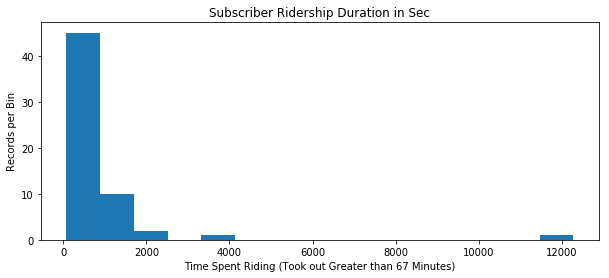

In [30]:
trip_times[(trip_times.subscriber_type == 'Subscriber')].hist('time_in_sec', bins = 15, figsize=(10,4))

plt.xlabel("Time Spent Riding (Took out Greater than 67 Minutes)")
plt.ylabel("Records per Bin")
plt.title("Subscriber Ridership Duration in Sec")

plt.grid(False)

In [31]:
trip_times.time_in_sec[trip_times.subscriber_type == 'Subscriber'].describe()

count       59.000000
mean       849.627119
std       1615.472376
min         70.000000
25%        339.000000
50%        530.000000
75%        847.500000
max      12280.000000
Name: time_in_sec, dtype: float64

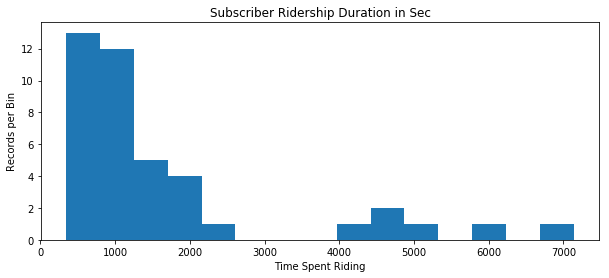

In [32]:
trip_times[(trip_times.subscriber_type == 'Customer')].hist('time_in_sec', bins = 15, figsize=(10,4))

plt.xlabel("Time Spent Riding")
plt.ylabel("Records per Bin")
plt.title("Subscriber Ridership Duration in Sec")

plt.grid(False)

In [33]:
trip_times.time_in_sec[trip_times.subscriber_type == 'Customer'].describe()

count      41.000000
mean     1620.975610
std      1676.944341
min       346.000000
25%       574.000000
50%      1030.000000
75%      1751.000000
max      7138.000000
Name: time_in_sec, dtype: float64

Both of the duration histograms above show the ride durations by subscribers and customers respectively. The datasets are both skewed to the right, with a mean that is larger than the median. However, If we look at the mean and quartiles, we see that the average subscriber trip is much shorter than the average customer trip (understanding of course that both sets of data do have outliers that have not been fully evaluated). In fact, the average customer ride is 27 minutes, while the average subscriber ride is 14 minutes.

## Conclusion

Overall, from a deal perspective, I would recommend that we offer a flat price for a single one-way trip and an annual membership. Of the subscribers, many seem to be using the service for commuting, so we can assume that they are using it often for shorter, purposeful trips to get from point A to point B. As overall ridership has declined a bit recently, I would recommend continuing to promote the annual membership and to do a bit of bikeshare marketing as a messaging reenforcement strategy.

Of the customers, which there are far fewer of, many seem to be using the service a bit more for leisure as more of their rides happen on the weekends, are longer in duration on average, and are more likely to start and end at the same station. As the average ride is 27 minutes, unlimited 30-minute rides for 24 hours likely will not work as many customers ride for more than 30 minutes. We should be marketing to customers to try the service on a weekend afternoon to tour San Francisco, or even target tourists specifically. Therefore, I would recommend offering a single one-way trip to customers.

In addition, we do see a large decline during the holiday period. I would recommend that Ford GoBike operate fewer bikes and/or use this time for annual maintenance.